In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_mse
from enkf_functions import enkf_regressor
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
layers = 4
neurons = [32, 32, 16, 1]

In [6]:
import time

In [7]:
setting_dict = {"particles": 1,
                "epochs": 20,
                "batch_size": 100,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

In [8]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]
particle_list = [2000]

Epoch 1. Training MSE: 0.816, Test MSE: 0.817.
Epoch 2. Training MSE: 0.792, Test MSE: 0.792.
Epoch 3. Training MSE: 0.787, Test MSE: 0.789.
Epoch 4. Training MSE: 0.771, Test MSE: 0.773.
Epoch 5. Training MSE: 0.762, Test MSE: 0.765.
Epoch 6. Training MSE: 0.746, Test MSE: 0.752.
Epoch 7. Training MSE: 0.72, Test MSE: 0.73.
Epoch 8. Training MSE: 0.691, Test MSE: 0.704.
Epoch 9. Training MSE: 0.651, Test MSE: 0.669.
Epoch 10. Training MSE: 0.607, Test MSE: 0.632.
Epoch 11. Training MSE: 0.589, Test MSE: 0.625.
Epoch 12. Training MSE: 0.639, Test MSE: 0.678.
Epoch 13. Training MSE: 0.681, Test MSE: 0.721.
Epoch 14. Training MSE: 0.657, Test MSE: 0.699.
Epoch 15. Training MSE: 0.587, Test MSE: 0.617.
Epoch 16. Training MSE: 0.546, Test MSE: 0.57.
Epoch 17. Training MSE: 0.564, Test MSE: 0.591.
Epoch 18. Training MSE: 0.539, Test MSE: 0.573.
Epoch 19. Training MSE: 0.51, Test MSE: 0.544.
Epoch 20. Training MSE: 0.503, Test MSE: 0.556.
Calculation time for 2000 particles: 656.344408464431

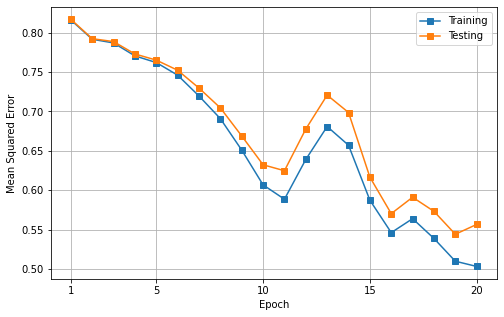

In [9]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model = enkf_regressor(X_train,
                                X_test,
                                y_train,
                                y_test,
                                layers,
                                neurons,
                                setting_dict,
                                save_all = True,
                                file_var = "../objects/wine/wine_enkf_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                file_model = "../models/wine/wine_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_mse(mean_model,
                mse_mean = None,
                start_epoch = 1,
                savefig = True,
                file = "../img/wine/wine_enkf_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [10]:
obj_dict = load_objects("../objects/wine/wine_enkf_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [11]:
final_model = nn_load("../models/wine/wine_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))